## Analysis of Best Places to Work Survey

In [20]:
#!pip install transformers
#!pip install torch
#!pip install pandas
#!pip install pandas matplotlib

In [1]:
import pandas as pd
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
import torch

**Load Data**

Define a function to load the data as a CSV

In [2]:
def load_data(filename, encoding='ISO-8859-1'):
    df = pd.read_csv(filename, encoding=encoding)
    return df

Input the name of CSV file.

In [3]:
df = load_data("Comment_Report.csv")

In [4]:
# print(df.head())

**Conduct Sentiment Analysis**

Define a sentiment analysis function using Hugging Face

In [5]:
def analyze_sentiment(df):
    # Load pre-trained BERT model for sentiment analysis
    model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    model = BertForSequenceClassification.from_pretrained(model_name)
    tokenizer = BertTokenizer.from_pretrained(model_name)
    
    sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

    # Apply sentiment analysis on the Comment column
    df['Sentiment'] = df['Comment'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if pd.notnull(x) else None)

    return df

Analyze the sentiment of our upladed file.

In [6]:
df_sentiment = analyze_sentiment(df)

In [7]:
#print(df_sentiment)

**Visualize Results**

Count comments by sentiment rating: 1-5 stars

In [8]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

5 stars    334
4 stars    157
3 stars    117
1 star     112
2 stars     59
Name: Sentiment, dtype: int64


Plot the counts as a bar chart, sorted (descending) by stars.

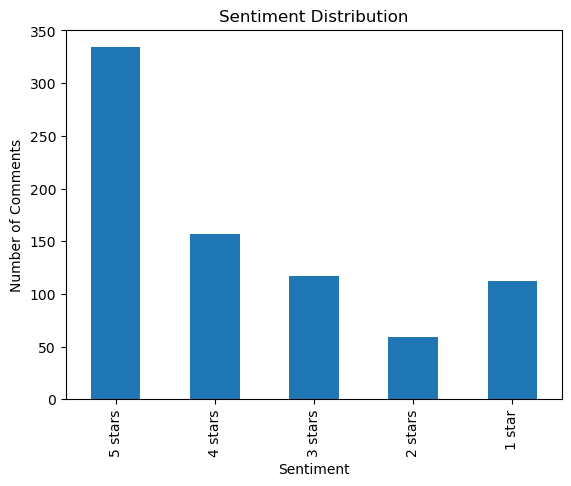

In [9]:
import matplotlib.pyplot as plt

# Specify the desired order
order = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']

# Subset the counts to this order
sentiment_counts_ordered = sentiment_counts[order]

sentiment_counts_ordered.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.ylabel('Number of Comments')
plt.xlabel('Sentiment')
plt.show()

**Analyze Topics and Themes**

Define positive comments as those with 5 stars

In [10]:
positive_comments = df[df['Sentiment'] == '5 stars']
#print(positive_comments.head(10))  # This will display the first five positive comments.

Analyze common themes for each question

In [11]:
import re
from collections import Counter
def get_common_words(df, question_number, top_n=10):
    # Filter comments for the specific question
    comments = df[df['Question '] == question_number]['Comment'].dropna()

    # Split comments into words, and count word frequency
    word_list = [word.lower() for comment in comments for word in re.findall(r'\w+', comment)]
    counter = Counter(word_list)

    # Remove common words which might not give much info (like 'the', 'is', etc.)
    stop_words = set(["i", "is", "are","me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
                      "yourself", "yourselves", "have", "he", "him", "his", "himself", "she", "her", "hers", "herself",
                      "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
                      "who", "whom", "this", "that", "these", "those", "a", "an", "the", "and", "but", "if", "or",
                      "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
                      "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in",
                      "out", "on", "off", "over", "under", "again", "further", "then", "once", "i3", "has", "been", "work",
                      "be", "s", "t", "not"])
    
    common_words = [(word, count) for word, count in counter.items() if word not in stop_words]
    common_words = sorted(common_words, key=lambda x: x[1], reverse=True)

    return common_words[:top_n]

Define a function to visualize the top words for each question

In [12]:

def visualize_common_words(filename):
    df = load_data(filename)
    unique_questions = df['Question '].unique()

    for question in unique_questions:
        common_words = get_common_words(df, question)
        words, counts = zip(*common_words)

        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top words for Question {question}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


In [13]:
filename = "Comment_Report.csv"

Visualize the most common words for each question in the uploaded file.

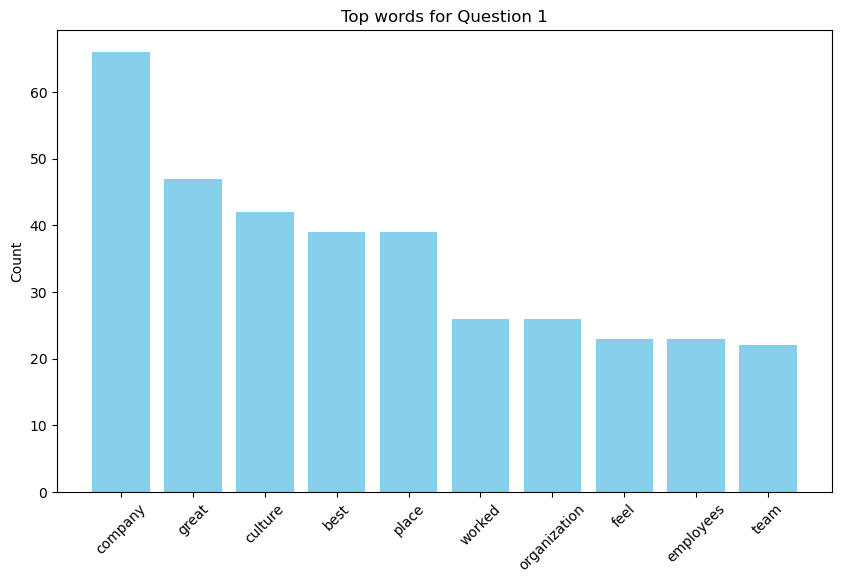

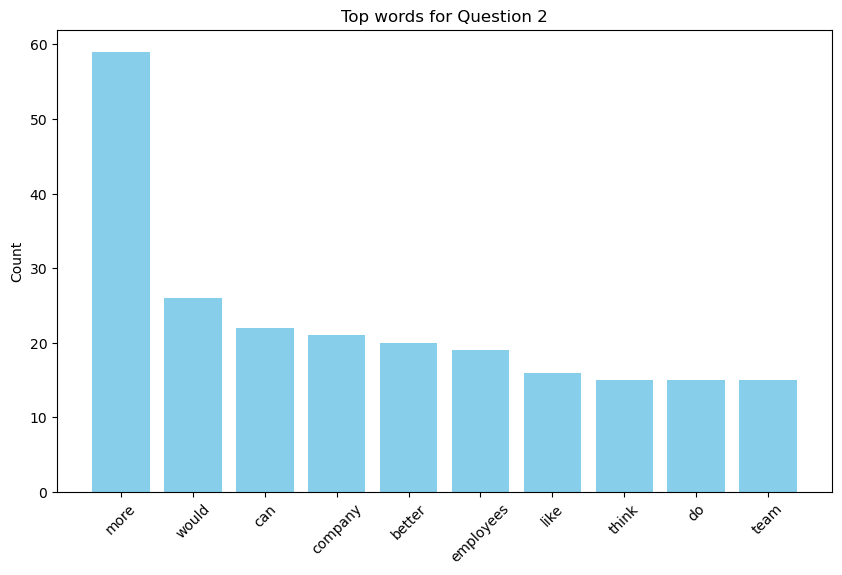

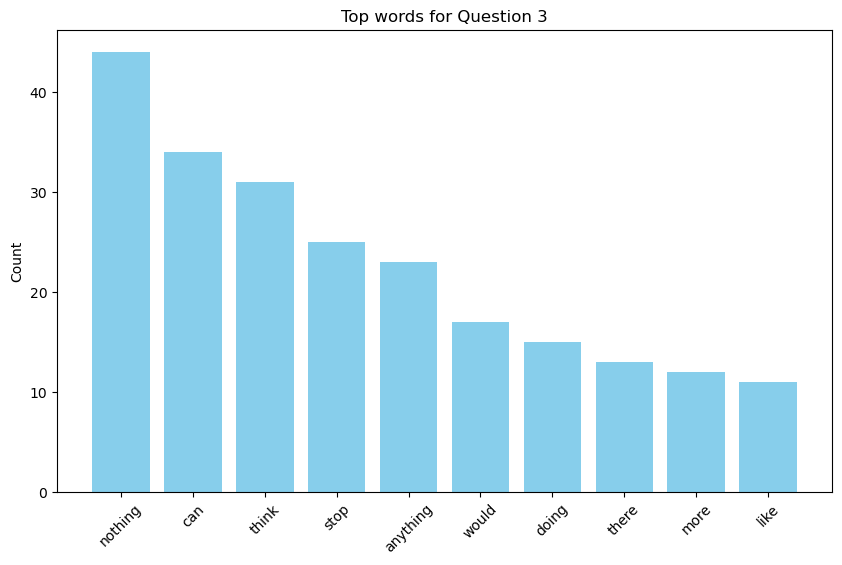

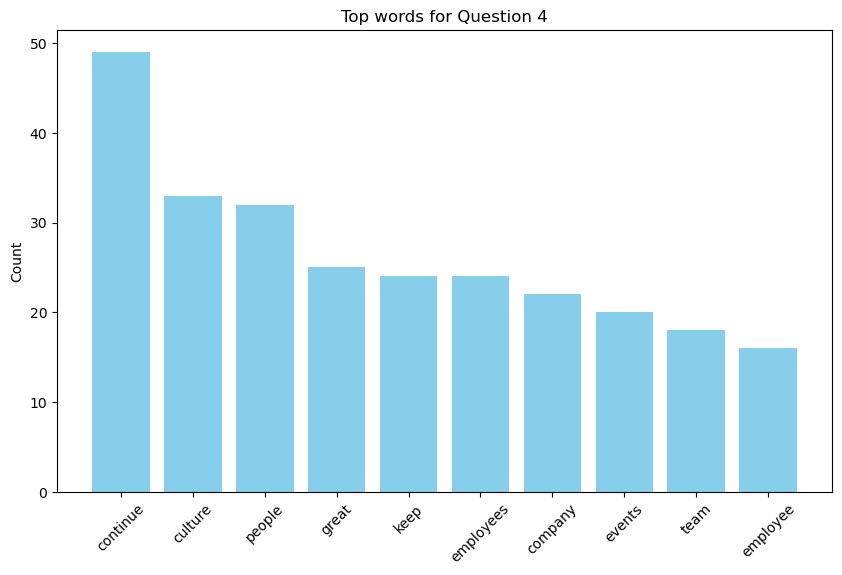

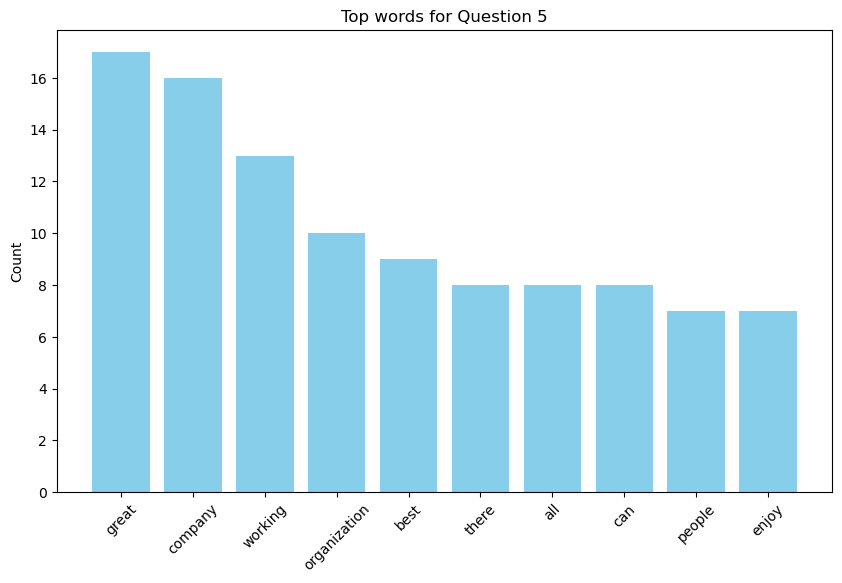

In [14]:
visualize_common_words(filename)

## Let's look at groups of words ##

Define a function to get common words

In [15]:
import re
from nltk.util import ngrams
from collections import Counter

def get_common_words(df, question_number, top_n=10, n=1):
    # Filter dataframe by question number and extract comments
    comments = df[df['Question '] == question_number]['Comment'].dropna()

    # Split comments into words
    word_list = [word.lower() for comment in comments for word in re.findall(r'\w+', comment)]
    
    # Generate n-grams
    ngram_list = [' '.join(words) for words in ngrams(word_list, n)] if n > 1 else word_list
    
    # Count n-gram frequency
    counter = Counter(ngram_list)

    # Remove common words which might not give much info (like 'the', 'is', etc.)
    common_words = counter.most_common(top_n)
    return common_words

Define a function to visualize top words for each question

In [16]:
def visualize_common_words(filename, n=1):
    df = load_data(filename)
    unique_questions = df['Question '].unique()

    for question in unique_questions:
        common_words = get_common_words(df, question, n=n)
        words, counts = zip(*common_words)

        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top words for Question {question}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

In [17]:
n_value = int(input("Enter the value or n (e.g., 1 for single words, 2 for bigrams, etc.): "))

Enter the value or n (e.g., 1 for single words, 2 for bigrams, etc.): 6


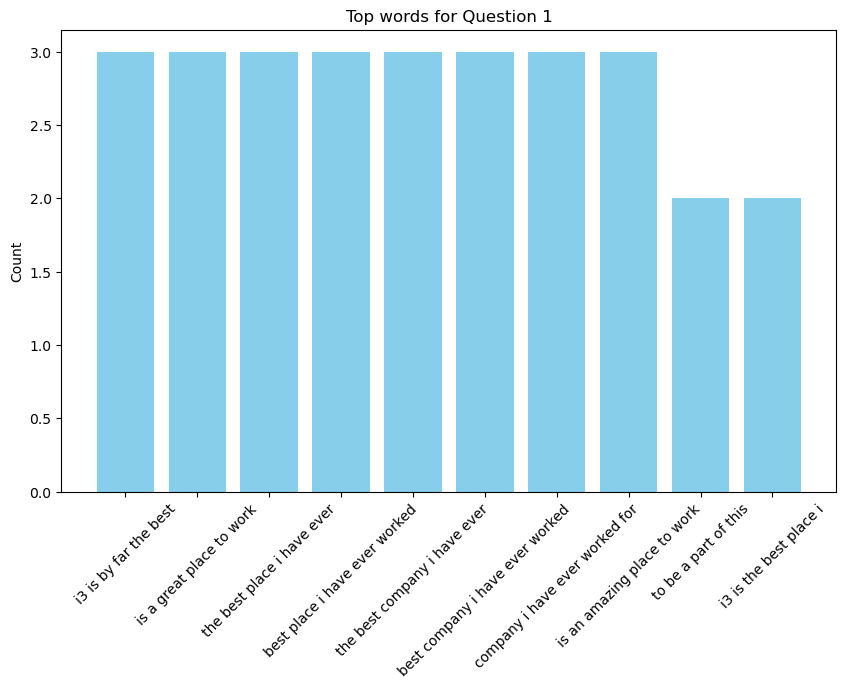

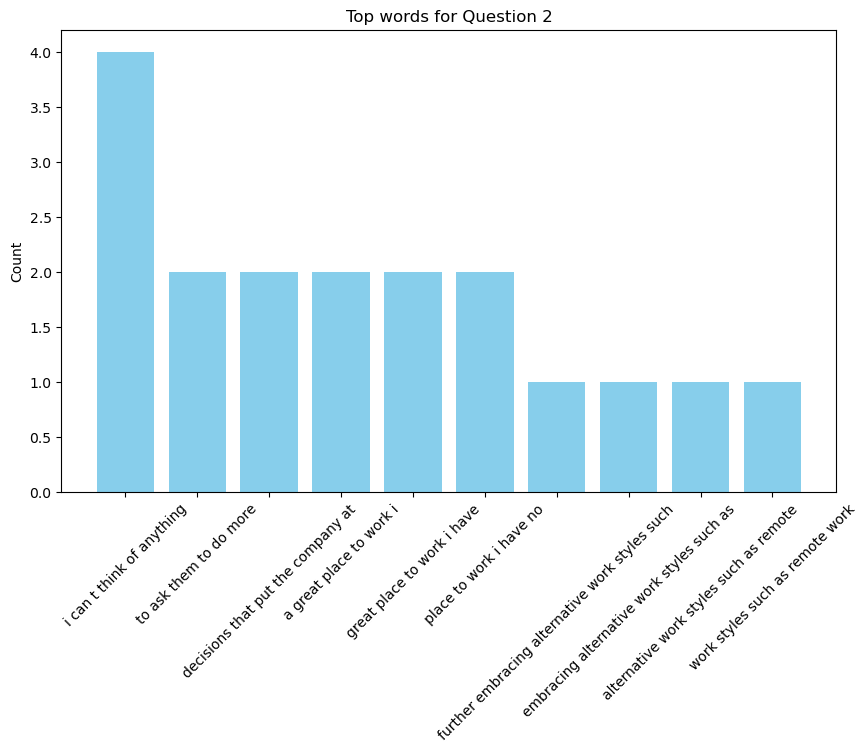

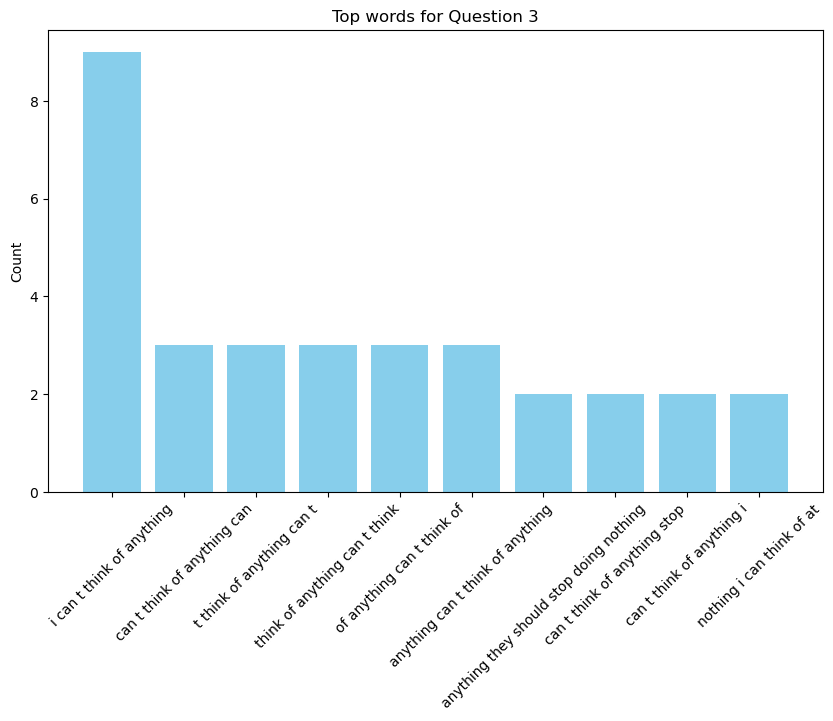

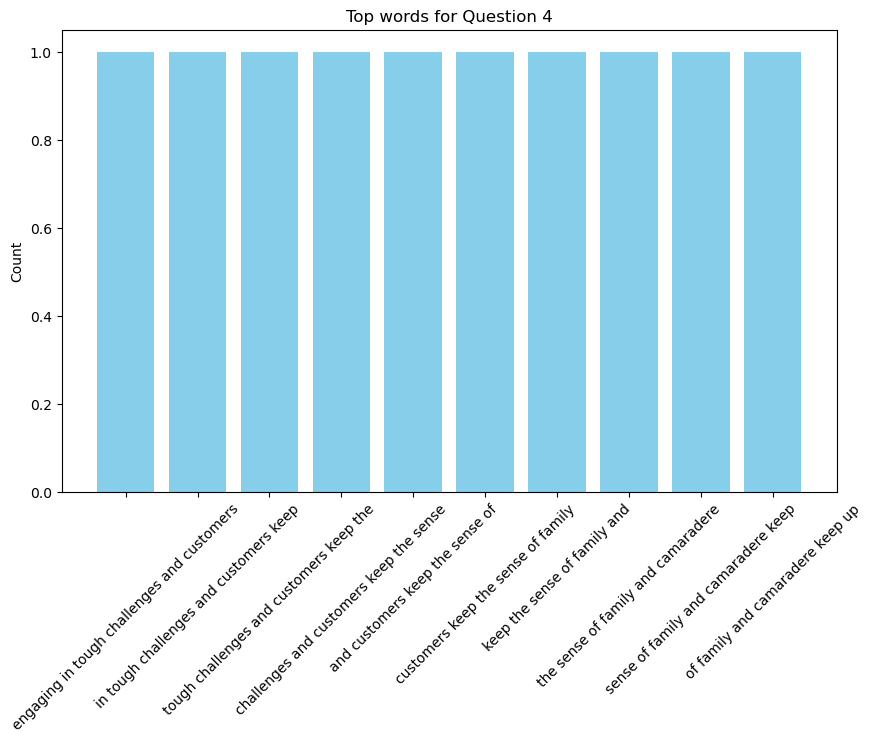

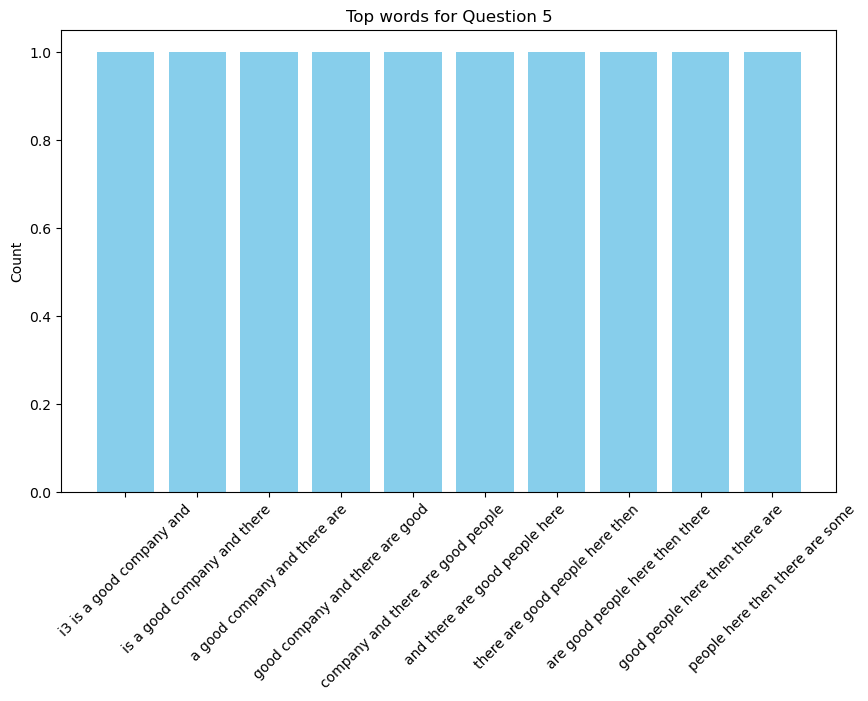

In [18]:
visualize_common_words(filename, n=n_value)